### Importing Relevant Packages

In [5]:
#Importando las librerías que vamos a necesitar
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

### Loading and Transforming the Data

In [7]:
raw_csv_data = pd.read_csv("/content/Index2018.csv") 
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')



### Removing Surplus Data

In [8]:
df_comp['market_value']=df_comp.spx

In [9]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

### White Noise

In [10]:
#Vamos a generar ruido blanco
#Generando valores aleatorios de distribución normal
#Usamod la media (loc) y la desviación (scale) de nuestros datos
wn = np.random.normal(loc = df.market_value.mean(), scale = df.market_value.std(), size = len(df))

In [11]:
#Creamos la nueva columna en el data frame
df['wn'] = wn

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
df.describe()

,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1097.155810
std,292.559287,292.753781
min,438.920000,76.503340
25%,914.620000,900.778133
50%,1144.650000,1097.948929
75%,1316.280729,1295.634104
max,1570.252238,2053.585944


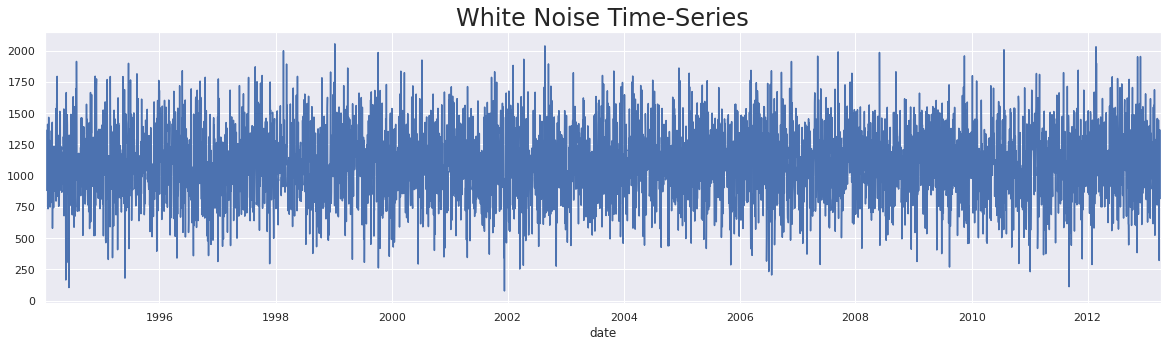

In [13]:
#Hacemos el gráfico del ruido blanco
df.wn.plot(figsize = (20,5))
plt.title("White Noise Time-Series", size= 24)
plt.show()

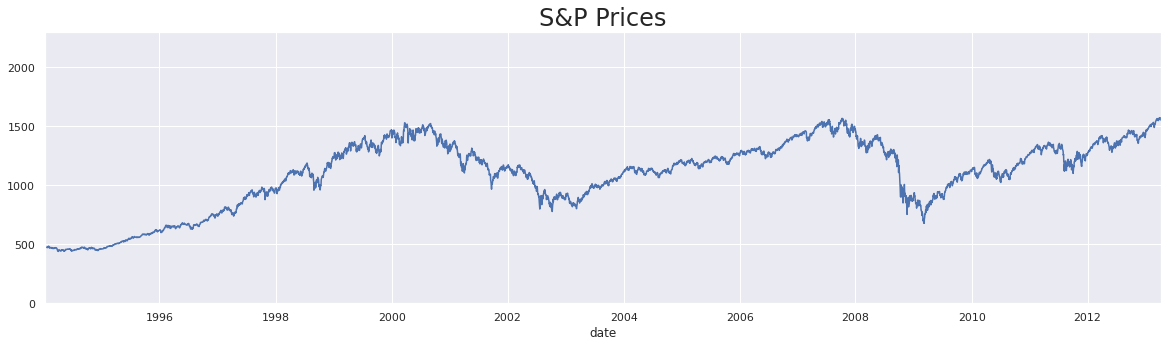

In [14]:
#Gráfico de los datos del índice original
df.market_value.plot(figsize=(20,5))
plt.title("S&P Prices", size = 24)
plt.ylim(0,2300)
plt.show()

### Random Walk

In [16]:
#Cargar el data set de Random walk
rw = pd.read_csv("/content/RandWalk.csv")


In [17]:
rw.head()

,date,price
0,07/01/1994,1122.139662
1,08/01/1994,1135.238562
2,09/01/1994,1109.897831
3,10/01/1994,1080.347860
4,11/01/1994,1082.095245


In [18]:
#Cobvertir la variable fecha a tipo date time
rw.date = pd.to_datetime(rw.date, dayfirst = True)


In [19]:
##Hacemos que la fecha sea el índice
rw.set_index("date", inplace = True)


In [20]:
rw.head()

,price
date,
1994-01-07,1122.139662
1994-01-08,1135.238562
1994-01-09,1109.897831
1994-01-10,1080.347860
1994-01-11,1082.095245


In [21]:
#Cambiamos la frecuencia a business day
rw = rw.asfreq('b')

In [22]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [23]:
#Agregamos el random walk al data set con sp500
df['rw'] = rw.price

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
df.head()

,market_value,wn,rw
date,,,
1994-01-07,469.90,1085.795221,1122.139662
1994-01-10,475.27,715.398635,1080.347860
1994-01-11,474.13,1201.587335,1082.095245
1994-01-12,474.17,1151.819044,1083.639265
1994-01-13,472.47,1131.161216,1067.146255


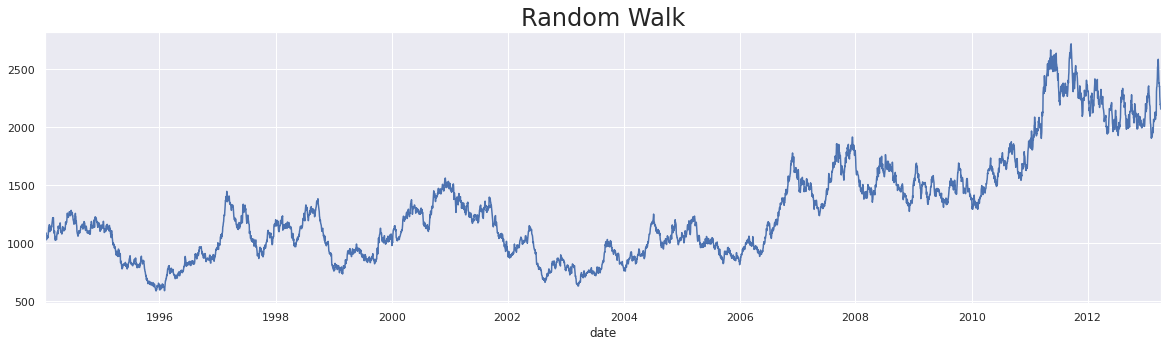

In [25]:
#Hacemos el g´raifo de la caminata aleatoria
df.rw.plot(figsize = (20,5))
plt.title("Random Walk", size = 24)
plt.show()

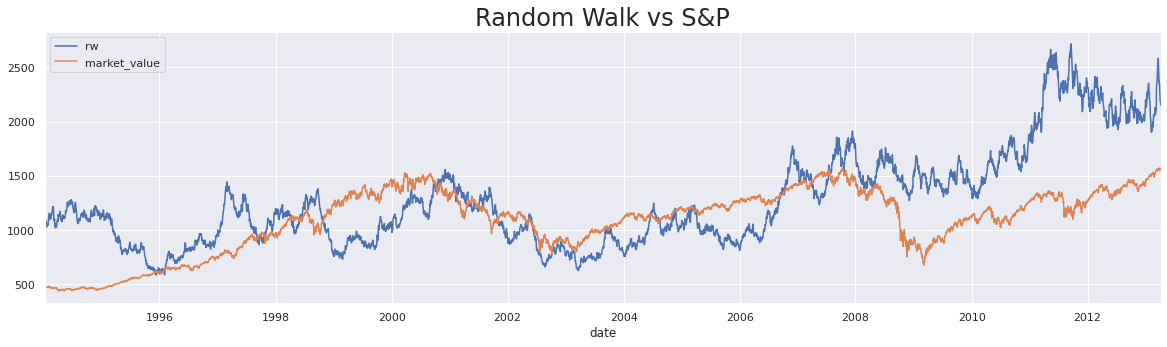

In [26]:
#Comparando la serie con la caminata aleatoria
df.rw.plot(figsize = (20,5))
df.market_value.plot()
plt.title("Random Walk vs S&P", size = 24)
plt.legend() 
plt.show()

### Stationarity

In [27]:
#Prueba Dickey-Fueller
#h0: la serie no es estacionaria
#H1: la serie es estacionaria
#Para ello usamos "adfuller"
sts.adfuller(df.market_value)
#Primer valor: Estadistico Calculado
#En los porcentajes estan los valores críticos
#En la segunda lína esta el p-valor
#Los niveles de significación son 0.01, 0.1, 0.05
#La serie no es estacionaria
#18 son los retrasos utilizados para la correlación

(-1.736984745235244,
 0.41216456967706194,
 18,
 5002,
 {'1%': -3.431658008603046,
  '10%': -2.567077669247375,
  '5%': -2.862117998412982},
 39904.880607487445)

In [28]:
sts.adfuller(df.wn)
#El ruido blanco es estacionario

(-71.39038115390456,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '10%': -2.5670765656497516,
  '5%': -2.8621159253018247},
 70829.3551560364)

In [29]:
#Para la caminata aleatoria
sts.adfuller(df.rw)
#La caminata alaeatioria no es estacionaria


(-1.3286073927689708,
 0.6159849181617388,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '10%': -2.567078038881065,
  '5%': -2.8621186927706463},
 46299.333497595144)

### Seasonality
La estacionalidad se refiere a que ciertas tendencias van a aparecer de forma ciclica.

Son patrones estacionales.
Un enfoque es decomponer la serie en 3 factores: Tendencia (Patrón), Estacional (Ciclos de la serie) y los residuos (error de prediccón)

La descomposición clasica tiene 2 enfoques: aditivo y mutiplicativo.

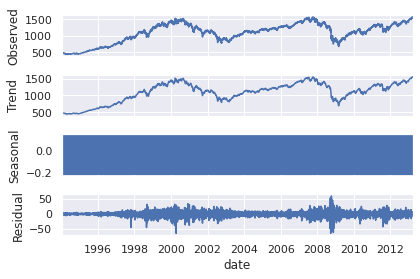

In [30]:
#Usamos el paquete "seasonal_decompose"
#Empecemos con la descomposición aditiva
#Para ello especificamos model="additive"
s_dec_additive = seasonal_decompose(df.market_value, model = "additive")
s_dec_additive.plot()
plt.show()
#Vemos :serie de tiempo
#Efecto de tendencia, estacional y residual
#La tendencia se parece mucho a la serie, explica la mayor parte de los datos
#Para la parte estacional, vemos que los valores estan de un lado a otro
#No hay un patrón ciclico
#Los residuos varian en el cambio de siglo y en el 2008

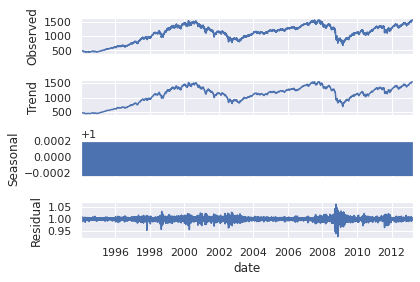

In [31]:
#Descomposición multiplicativa
s_dec_multiplicative = seasonal_decompose(df.market_value, model = "multiplicative")
s_dec_multiplicative.plot()
plt.show()

### ACF

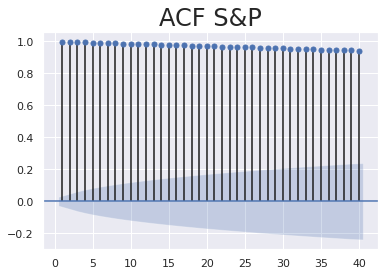

In [32]:
#Función de autocorrelaicón en Python
#Es usando stats models, con la función "plot_acf"
#Lags serán los retrasos que queremos observar, 
#por defecto es la longitud de la serie
#"zero=False" se refiere a si se incluye el valor actual
#False es para no tener que incluir el primer valor de la serie
sgt.plot_acf(df.market_value, lags = 40, zero = False)
plt.title("ACF S&P", size = 24)
plt.show()
#Tenemos una correlación muy, muy alta

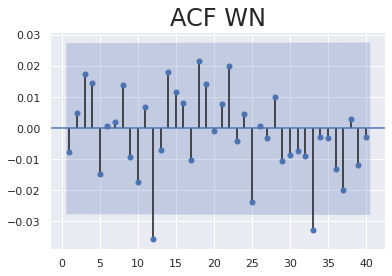

In [33]:
#Hagamos lo mismo para el ruido blanco
sgt.plot_acf(df.wn, lags = 40, zero = False)
plt.title("ACF WN", size = 24)
plt.show()
#Todo esta dentro de la sección azul
#La correlación es estadísticamente 0

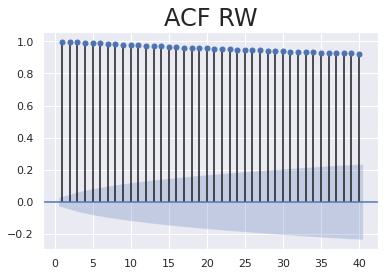

In [34]:
#Para la caminata aleatoria vemos su autocorrelación
sgt.plot_acf(df.rw, lags = 40, zero = False)
plt.title("ACF RW", size = 24)
plt.show()

### PACF

La autocorrelación parcial, mide los efectos indirectos que tiene los valores con sus retrasos.
Para la autocorrelación directa, usamod la autocorrelación parcial

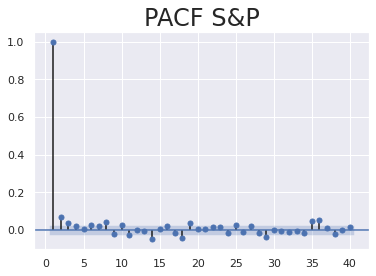

In [35]:
#Autocorrelación parcial de la serie del SP500
#Tiene la misma escructura que la ACF
#Pero le debemos de especificar el método
#ols son los mínimos cuadrados ordinarios
sgt.plot_pacf(df.market_value, lags = 40, zero = False, method = ('ols'))
plt.title("PACF S&P", size = 24)
plt.show()
#Aquí solo los primeros valores son significativos
#Los valores pueden ser negativos, 
#esto se refiere a la disminución de los precios

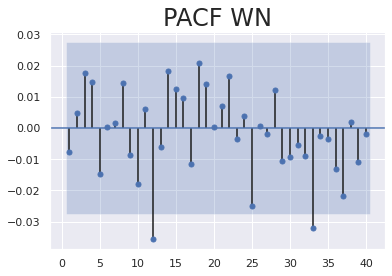

In [36]:
#Para el ruido blanco
sgt.plot_pacf(df.wn, lags = 40, zero = False, method = ('ols'))
plt.title("PACF WN", size = 24)
plt.show()
#No hay autocorrelación con el ruido blanco

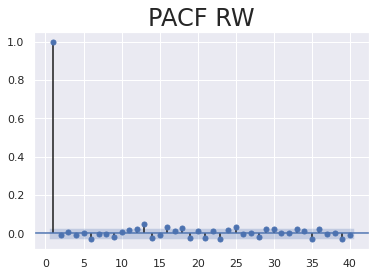

In [37]:
#Para la caminata aleatoria
sgt.plot_pacf(df.rw, lags = 40, zero = False, method = ('ols'))
plt.title("PACF RW", size = 24)
plt.show()
#Se parece mucho a la serie original